**Deep Learning Tutorial**, Azar 18 at 17:00 via Skype 
Class Room, DL Recitation, Session Eleven **and** Azar 20, Video Tutorial Two 

[Deep Learning](https://github.com/hhaji/Deep-Learning), Data Science Center, Shahid Beheshti University

Presented and prepared by [‌‌Yavar Yeganeh](https://github.com/YavarYeganeh)




**Acknowledgment and References:**

* [Pytorch](www.Pytorch.org)

* Others listed throughout the notebook


<table align="left">
  <td>
    <a target="_blank" href=https://colab.research.google.com/drive/10UJlzZ6A0bcziqeVeC6BZKEF6e23W7BI?usp=sharing"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" height="100" width="100" /> <br>  Run in Google Colab</a>
  </td>
</table>

# Sequence Modeling: Recurrent and Recursive Networks

Today we will discuss:

* **A quick review of recurrent models**
* **Classes for recurrent modeling in PyTorch**
* **Implementation of recurrent models in PyTorch with Examples**

Video Tutorial 2:
* **An example of recurrent models in NLP**



 **Suggested Materials:**
  
   Basic to intermediate implementations:

  - [Building RNNs is Fun with PyTorch and Google Colab](https://medium.com/dair-ai/building-rnns-is-fun-with-pytorch-and-google-colab-3903ea9a3a79)

  - [Pytorch [Basics] — Intro to RNN](https://towardsdatascience.com/pytorch-basics-how-to-train-your-neural-net-intro-to-rnn-cb6ebc594677)

  - [PyTorch LSTM: Text Generation Tutorial](https://www.kdnuggets.com/2020/07/pytorch-lstm-text-generation-tutorial.html)

  - [Recurrent Neural Network in PyTorch for Text Generation](https://analyticsindiamag.com/recurrent-neural-network-in-pytorch-for-text-generation/)

  - [Time Series Prediction using LSTM with PyTorch in Python](https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/)

 

## A quick review of recurrent models

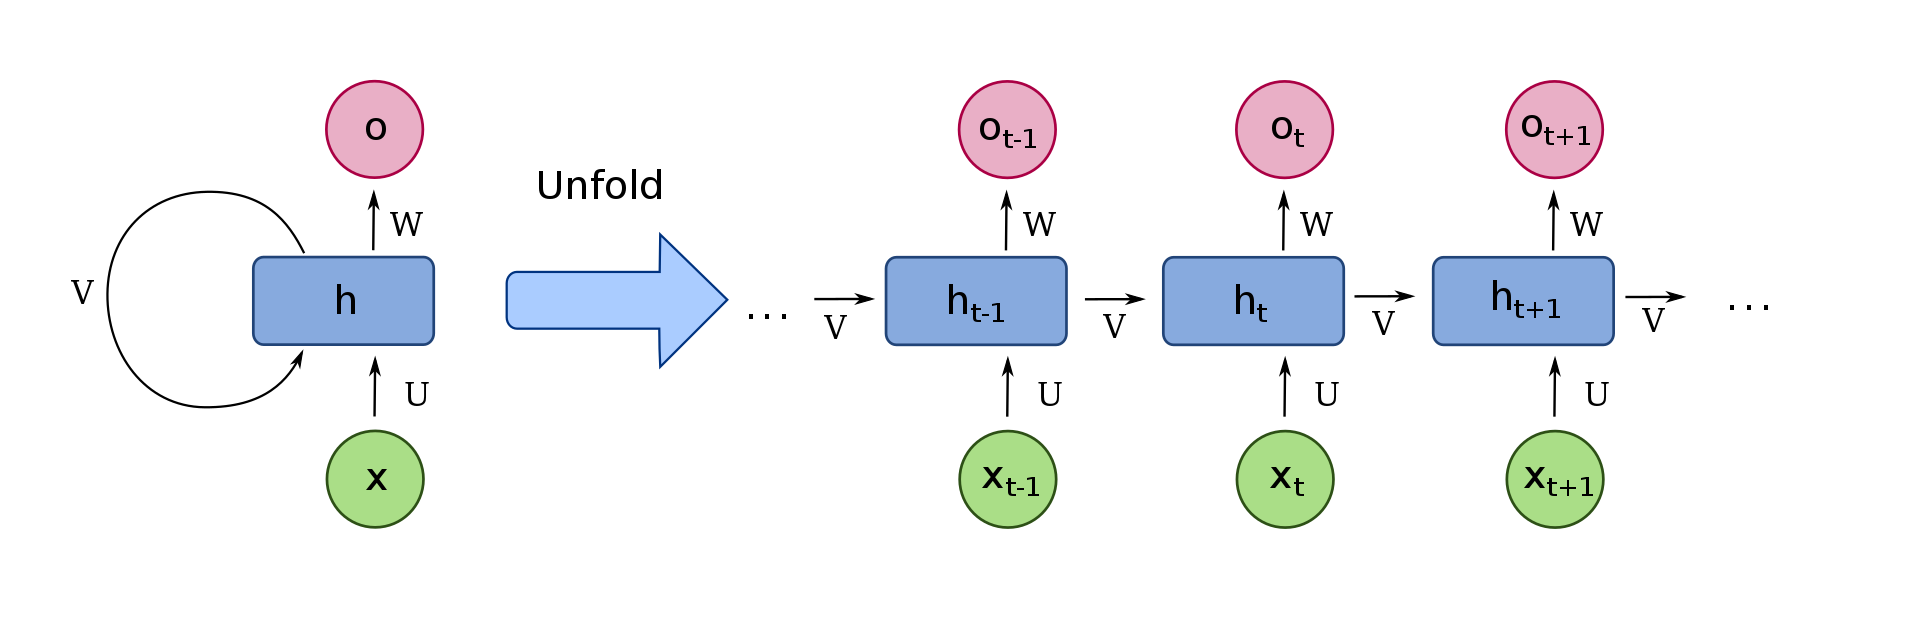


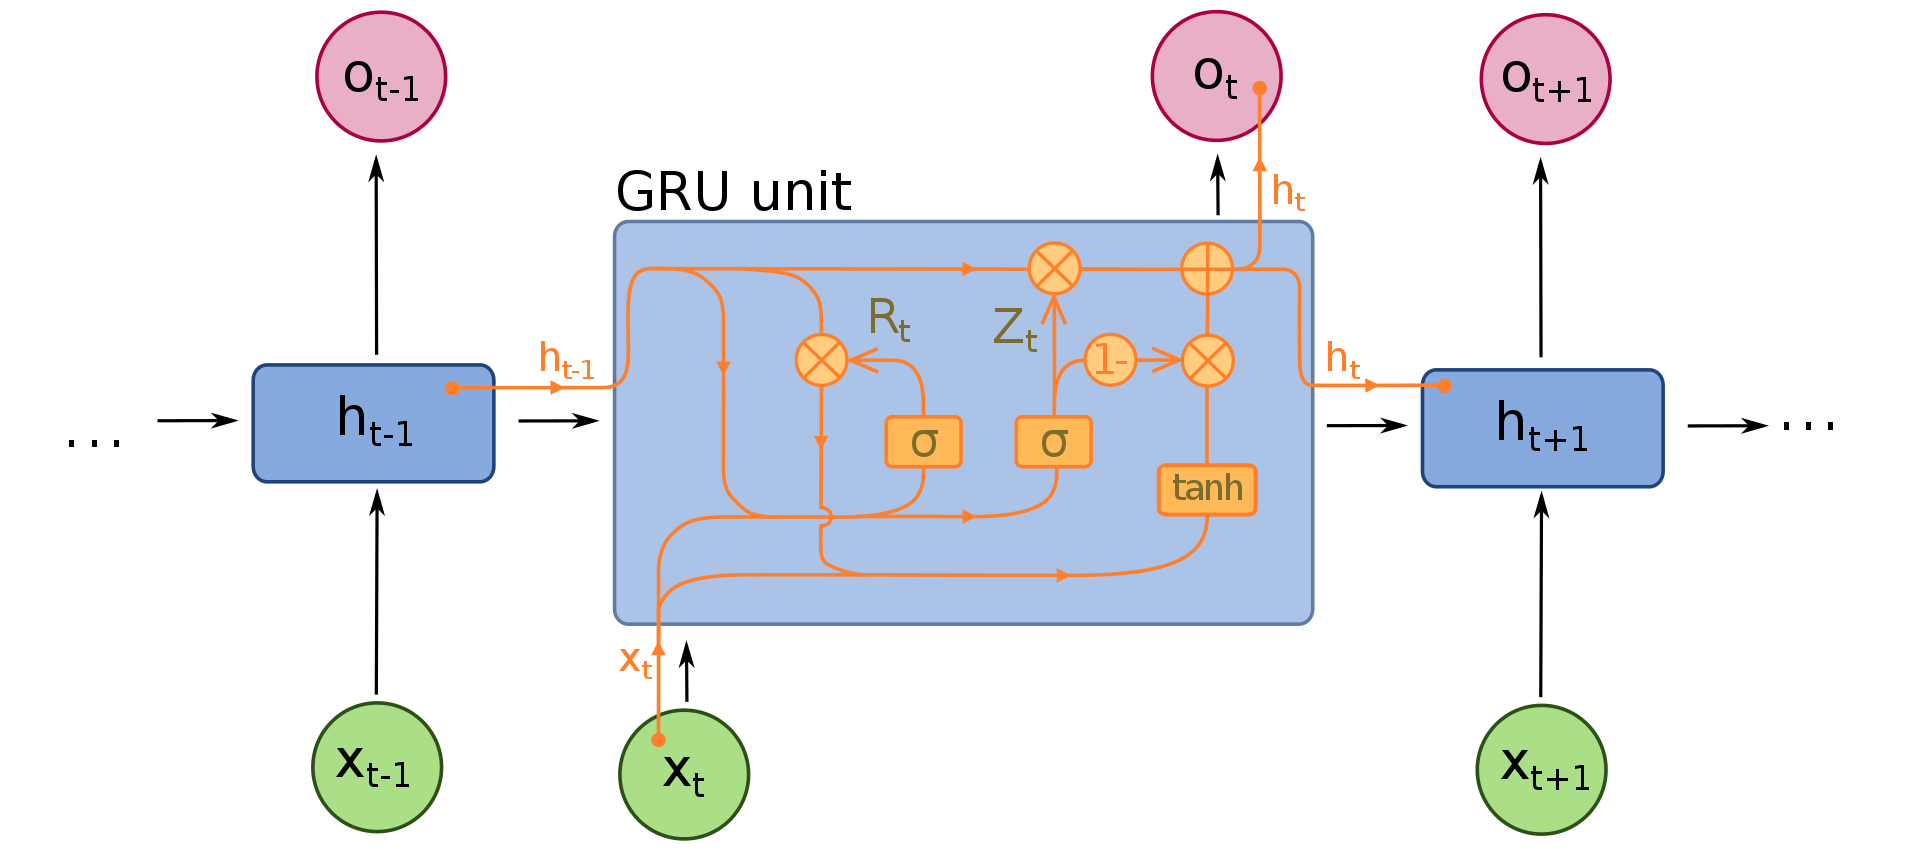




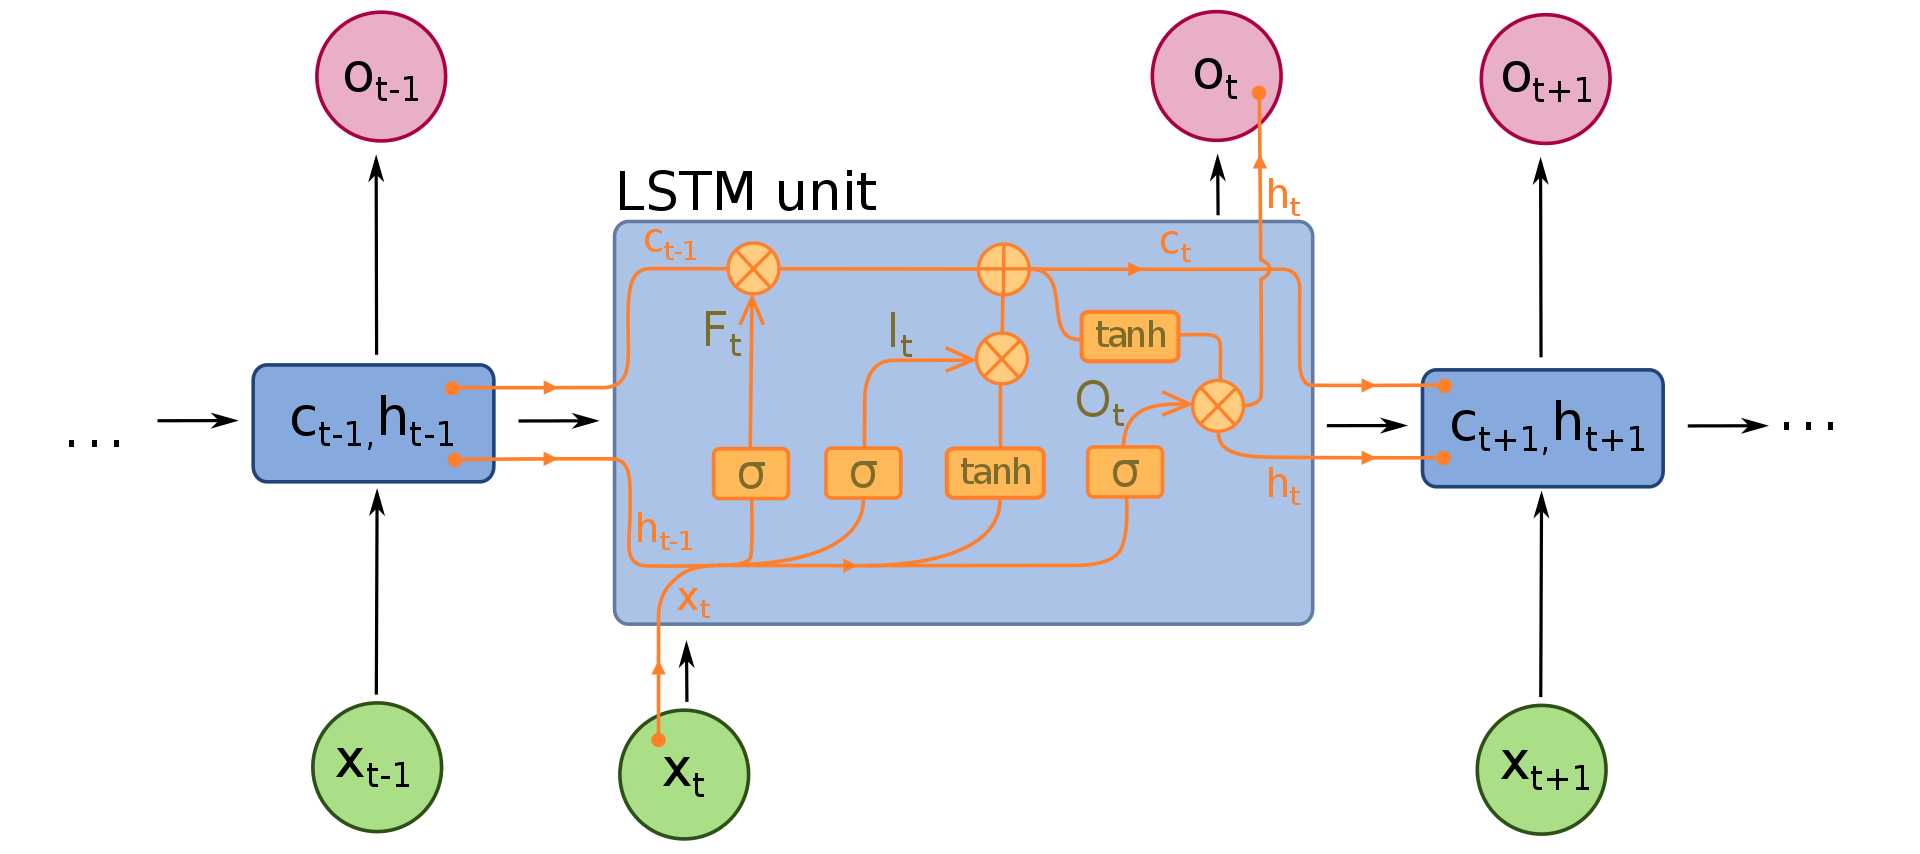

---



Images by Wikipedia!

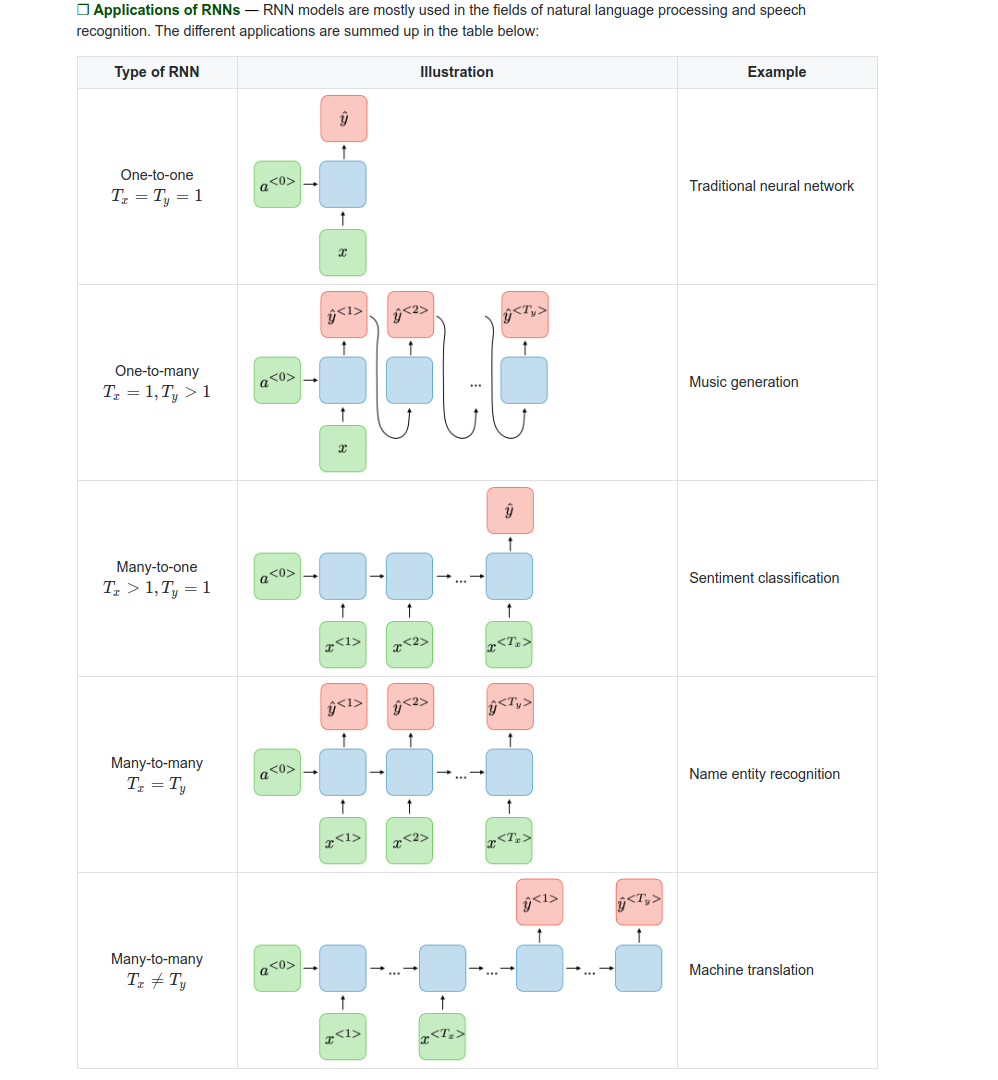
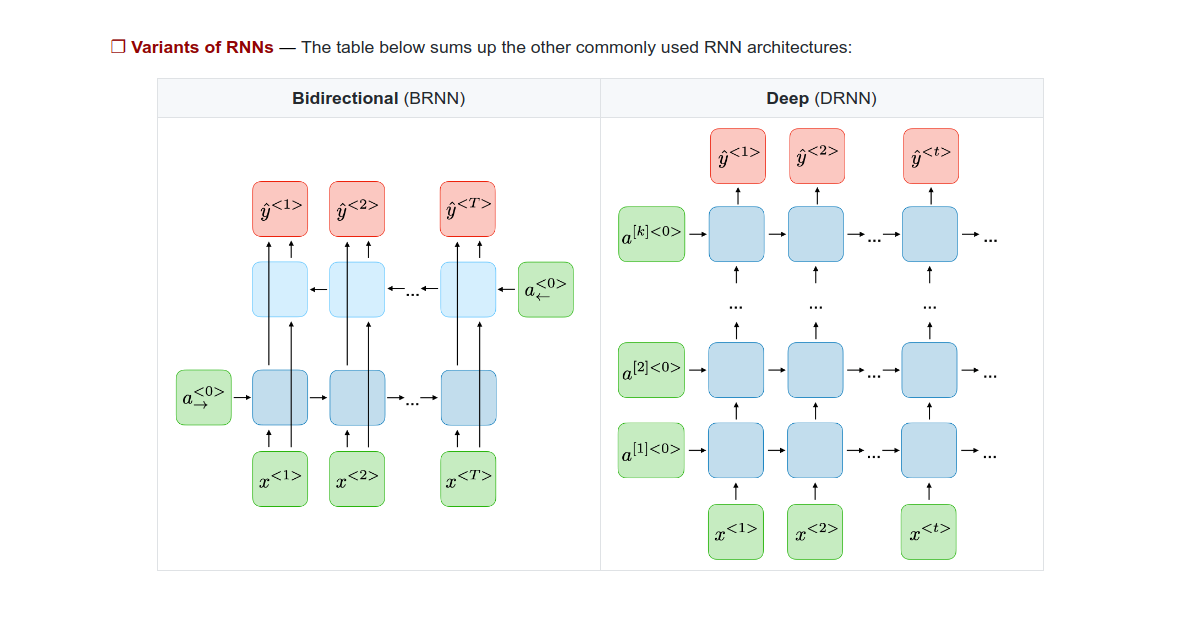
Based on [Recurrent Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks) by Afshine Amidi and Shervine Amidi

## Classes regarding recurrent models in PyTorch

* RNN: https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
* GRU: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html
* LSTM: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
* PACKED_SEQUENCE:https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.PackedSequence.html#torch.nn.utils.rnn.PackedSequence
* PACK_PADDED_SEQUENCE:https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html#torch.nn.utils.rnn.pack_padded_sequence

Also see these for variable size sequences: 

* https://suzyahyah.github.io/pytorch/2019/07/01/DataLoader-Pad-Pack-Sequence.html
* https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
vanila_rnn=nn.RNN(1,2,1)
input=torch.rand(2,2,1)
output, hn = vanila_rnn(input)
print(input, '\n output:')
print(output, '\n hn: \n', hn, '\n shapes:')
print(output.shape, hn.shape)

tensor([[[0.2445],
         [0.6124]],

        [[0.5102],
         [0.0965]]]) 
 output:
tensor([[[0.0122, 0.6068],
         [0.2300, 0.6818]],

        [[0.3741, 0.5598],
         [0.1807, 0.4800]]], grad_fn=<StackBackward>) 
 hn: 
 tensor([[[0.3741, 0.5598],
         [0.1807, 0.4800]]], grad_fn=<StackBackward>) 
 shapes:
torch.Size([2, 2, 2]) torch.Size([1, 2, 2])


In [ ]:
 rnn = nn.RNN(2, 4, 2, batch_first=True)
 input = torch.randn(3, 3, 2)
 h0 = torch.randn(2, 3, 4)
 output, hn = rnn(input, h0)
 print(output, '\n hn: \n', hn, '\n shapes:')
 print(output.shape, hn.shape)

tensor([[[ 0.1537, -0.1454, -0.0827, -0.6778],
         [ 0.3687, -0.2540, -0.0230, -0.4399],
         [ 0.4141, -0.1157,  0.1509, -0.2294]],

        [[-0.3879, -0.7226, -0.7056, -0.8057],
         [ 0.4222, -0.3676, -0.0808, -0.9025],
         [ 0.5180, -0.4509,  0.2228, -0.7174]],

        [[ 0.1089, -0.5384, -0.6114, -0.6924],
         [ 0.5339, -0.4191,  0.2548, -0.8959],
         [ 0.4238, -0.4626,  0.4925, -0.6635]]], grad_fn=<TransposeBackward1>) 
 hn: 
 tensor([[[-0.6442,  0.0475, -0.0406,  0.3630],
         [ 0.2316, -0.1674, -0.7679,  0.4030],
         [ 0.0271,  0.6198, -0.6935,  0.6901]],

        [[ 0.4141, -0.1157,  0.1509, -0.2294],
         [ 0.5180, -0.4509,  0.2228, -0.7174],
         [ 0.4238, -0.4626,  0.4925, -0.6635]]], grad_fn=<StackBackward>) 
 shapes:
torch.Size([3, 3, 4]) torch.Size([2, 3, 4])


In [ ]:
 rnn = nn.RNN(20, 100, 6)
 input = torch.randn(5, 3, 20)
 h0 = torch.randn(6, 3, 100)
 output, hn = rnn(input, h0)
 print(output, '\n hn: \n', hn, '\n shapes:')
 print(output.shape, hn.shape)

tensor([[[-0.2221, -0.3796,  0.5943,  ...,  0.3044, -0.0313, -0.0935],
         [ 0.6137,  0.5115,  0.7330,  ..., -0.0063, -0.3153, -0.9435],
         [ 0.1386, -0.2209, -0.0862,  ...,  0.8129,  0.3509,  0.1617]],

        [[ 0.2267,  0.5172, -0.2594,  ...,  0.0917, -0.2013,  0.2638],
         [-0.2681,  0.0096, -0.0934,  ...,  0.2546, -0.0844,  0.1311],
         [ 0.1564, -0.1346,  0.2021,  ..., -0.5392,  0.2162,  0.2797]],

        [[ 0.0438,  0.2618,  0.0718,  ..., -0.0819,  0.4508,  0.3156],
         [ 0.2775,  0.4767,  0.0175,  ..., -0.3702,  0.2067,  0.0354],
         [ 0.4376,  0.0222, -0.0371,  ...,  0.0838,  0.3481,  0.0048]],

        [[ 0.1484, -0.1833,  0.3333,  ..., -0.0619,  0.1398,  0.0180],
         [ 0.0050,  0.0790,  0.2140,  ...,  0.1327,  0.0228,  0.1993],
         [ 0.0013, -0.1589,  0.2683,  ...,  0.1893,  0.0289,  0.0864]],

        [[ 0.1450,  0.2617,  0.0473,  ...,  0.0425,  0.1289,  0.0596],
         [ 0.0012,  0.1197,  0.0796,  ...,  0.0755,  0.1712,  0.0346]

In [ ]:
 rnn_1 = nn.RNN(2, 4, 2, batch_first=True, bidirectional=True)
 input = torch.randn(3, 4, 2)
 h0 = torch.randn(4, 3, 4) ###
 output, hn = rnn_1(input, h0)
 print(output, '\n hn: \n', hn, '\n shapes:')
 print(output.shape, hn.shape)

tensor([[[-0.1896, -0.4996,  0.7434, -0.6307, -0.6928,  0.3742, -0.7425,
          -0.0695],
         [ 0.3203,  0.5879, -0.0583, -0.5603, -0.7752,  0.1671, -0.6579,
          -0.2257],
         [ 0.1501,  0.7201,  0.7675,  0.2127, -0.7457,  0.3567, -0.5960,
          -0.1939],
         [-0.2196,  0.3280,  0.6991, -0.4352, -0.0551, -0.5939, -0.9126,
          -0.5810]],

        [[-0.2356, -0.7165,  0.6944, -0.7048, -0.5636,  0.0955, -0.6296,
          -0.2374],
         [ 0.4472,  0.5343,  0.1508, -0.8485, -0.5516, -0.5359, -0.8450,
          -0.2681],
         [-0.1940,  0.3288, -0.2965, -0.3836, -0.4632,  0.3995, -0.2021,
           0.2418],
         [ 0.5327,  0.5558,  0.5486, -0.3078, -0.4440, -0.5078, -0.9805,
          -0.9161]],

        [[ 0.2587,  0.8663,  0.4166,  0.7330, -0.8766,  0.3419, -0.8508,
          -0.2825],
         [-0.2732,  0.2404,  0.7161,  0.0688, -0.8887,  0.4297, -0.7818,
          -0.3083],
         [ 0.2139,  0.7343,  0.8386,  0.0735, -0.7347,  0.4039, -0

In [ ]:
 input = torch.randn(5, 7, 2)
 h0 = torch.randn(4, 5, 4) ###
 output, hn = rnn_1(input, h0)
 print(output, '\n hn: \n', hn, '\n shapes:')
 print(output.shape, hn.shape)

tensor([[[ 0.7719, -0.3598,  0.5173, -0.7192, -0.9346,  0.8564, -0.7980,
          -0.1910],
         [ 0.0205,  0.5759,  0.5264,  0.1226, -0.8545,  0.6780, -0.6999,
          -0.4996],
         [-0.0874,  0.4222,  0.8424, -0.3526, -0.7734, -0.3535, -0.7823,
          -0.3815],
         [ 0.0811,  0.6463,  0.6920, -0.3234, -0.7028, -0.3295, -0.8490,
          -0.0087],
         [-0.2165,  0.4919,  0.2338, -0.1292, -0.6982,  0.1481, -0.6108,
          -0.3250],
         [ 0.1803,  0.5393,  0.7081, -0.3849, -0.8733, -0.2724, -0.8208,
          -0.0814],
         [-0.1160,  0.8773,  0.7430,  0.6443, -0.8879,  0.6000, -0.7292,
          -0.3044]],

        [[-0.7279, -0.2909,  0.8195,  0.2912, -0.9239,  0.5681, -0.8383,
          -0.3258],
         [ 0.6336,  0.6995,  0.7571, -0.1455, -0.8889,  0.4617, -0.8617,
          -0.2627],
         [-0.3066,  0.5487,  0.7473,  0.3793, -0.9109,  0.1741, -0.8801,
          -0.2661],
         [ 0.3719,  0.6991,  0.7695,  0.3915, -0.9168,  0.5037, -0.9

In [ ]:
gru = nn.GRU(10, 20, 2)
input = torch.randn(6, 4, 10)
h0 = torch.randn(2, 4, 20)
output, hn = gru(input, h0)
print(output, '\n hn: \n', hn, '\n shapes:')
print(output.shape, hn.shape)

tensor([[[-7.9441e-02, -6.3262e-01,  3.6211e-01, -1.0283e-01,  7.2152e-02,
           1.9547e+00,  1.8710e-02, -3.3214e-01,  3.0198e-01,  1.0125e-02,
          -2.7613e-01, -5.4529e-01,  1.7486e-01,  2.6915e-01, -5.0583e-01,
           1.2695e+00,  9.3885e-02,  8.1235e-01,  4.2315e-01,  7.2907e-01],
         [-4.6562e-02,  4.9153e-01,  3.5050e-01, -6.3082e-01,  1.5297e-01,
           1.7234e-01, -4.9082e-01, -2.7751e-01,  6.1581e-01,  1.4348e+00,
          -1.1849e+00,  5.1366e-01,  5.2371e-01, -5.4660e-01, -4.0634e-01,
          -9.3739e-01,  3.6591e-01, -1.9727e-01, -2.1578e-01,  1.2287e+00],
         [-9.0381e-02, -7.4467e-01, -4.4992e-01, -4.1746e-02,  3.7813e-01,
          -7.9127e-01,  3.2776e-02,  2.7405e-01,  7.3854e-01, -2.3790e-01,
           4.0398e-01,  1.7684e-01, -1.7002e-01,  5.7687e-02, -8.1562e-02,
          -2.2715e-01,  4.5781e-01,  1.2780e-01, -9.9295e-01,  1.7167e-01],
         [ 2.9953e-01,  4.1215e-01,  9.0951e-01,  4.1171e-01, -6.9620e-01,
          -5.9848e-01,

In [ ]:

lstm = nn.LSTM(10, 20, 2)
input = torch.randn(6, 4, 10)
h0 = torch.randn(2, 4, 20)
c0 = torch.randn(2, 4, 20)
output, (hn, cn) = lstm(input, (h0,c0))
print(output, '\n hn: \n', (hn, cn), '\n shapes:')
print(output.shape, hn.shape)

tensor([[[ 5.2443e-02,  2.6263e-01, -1.3231e-01,  6.4431e-02,  4.0778e-01,
           9.6895e-02,  1.3543e-01,  5.8649e-02, -3.2689e-01, -3.2372e-01,
           9.3292e-02, -4.5088e-02, -4.8206e-02,  4.3331e-02,  5.5483e-02,
          -2.1862e-01,  1.9330e-01, -2.6149e-01,  2.5922e-01,  1.5963e-01],
         [ 5.0561e-01,  9.8626e-02, -1.4516e-02, -1.6190e-01, -4.8079e-01,
          -5.2704e-02,  1.8063e-01, -2.0557e-01,  2.1908e-02, -9.1286e-02,
          -1.5753e-01, -6.0524e-01,  3.2466e-01,  1.0634e-01,  3.7333e-02,
          -1.2075e-01, -2.2804e-02, -2.9838e-01,  1.2236e-01,  1.8563e-02],
         [-2.5674e-01,  5.9186e-02,  9.2388e-02,  2.9794e-01, -2.2617e-01,
           5.5662e-02, -1.7927e-01,  2.4329e-01, -1.3355e-02, -1.6337e-01,
           2.0563e-01,  1.0623e-01, -1.6299e-02, -1.6223e-01, -1.0987e-01,
           4.2591e-01, -8.5420e-02, -1.4651e-01, -7.6053e-03, -1.7376e-02],
         [ 7.2713e-02, -1.4006e-01, -2.8810e-03, -1.8579e-02,  2.5055e-01,
          -7.9301e-02,

## A basic implementation of recurrent models
 
Borrowed from Deep Learning Wizard:

* https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_recurrent_neuralnetwork/
* https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_lstm_neuralnetwork/

In [ ]:
!git clone https://github.com/ritchieng/deep-learning-wizard.git
%cd /content/deep-learning-wizard/docs/deep_learning/practical_pytorch
!ls

# 8. Recurrent Neural Network with PyTorch
## 1. About Recurrent Neural Network

### 1.1 Feedforward Neural Networks Transition to Recurrent Neural Networks
- **RNN is essentially an FNN**

<img src="./images/rnn0-1.png" alt="deeplearningwizard" style="width: 700px;"/>
<img src="./images/rnn0-2.png" alt="deeplearningwizard" style="width: 900px;"/>

## 2. Building a Recurrent Neural Network with PyTorch

### Model A: 1 Hidden Layer (ReLU)
- Unroll 28 time steps
    - Each step input size: 28 x 1
    - Total per unroll: 28 x 28
        - Feedforward Neural Network input size: 28 x 28 
- 1 Hidden layer
- ReLU Activation Function
<img src="./images/rnn2n.png" alt="deeplearningwizard" style="width: 500px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset
**Images from 1 to 9**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [ ]:
print(train_dataset.train_data.size())

torch.Size([60000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
print(train_dataset.train_labels.size())

torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
print(test_dataset.test_data.size())

torch.Size([10000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
print(test_dataset.test_labels.size())

torch.Size([10000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Step 2: Make Dataset Iterable

In [ ]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

10


### Step 3: Create Model Class
<img src="./images/rnn2n.png" alt="deeplearningwizard" style="width: 500px;"/>

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, input_dim)
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        # (layer_dim, batch_size, hidden_dim)
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 10
        # out[:, -1, :] --> 100, 10 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

### Step 4: Instantiate Model Class

- 28 time steps
    - Each time step: input dimension = 28
- 1 hidden layer
- MNIST 1-9 digits $\rightarrow$ output dimension = 10

In [ ]:
input_dim = 28
hidden_dim = 100
layer_dim = 1
output_dim = 10

In [ ]:
model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

### Step 5: Instantiate Loss Class
- Recurrent Neural Network: **Cross Entropy Loss**
    - _Convolutional Neural Network_: **Cross Entropy Loss**
    - _Feedforward Neural Network_: **Cross Entropy Loss**
    - _Logistic Regression_: **Cross Entropy Loss**
    - _Linear Regression_: **MSE**
    

In [ ]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our tensors with gradient accumulation abilities)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [ ]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameters In-Depth

In [ ]:
len(list(model.parameters()))

6

**Parameters**
- Input to Hidden Layer Linear Function
    - A1, B1
- HIdden Layer to Output Linear Function
    - A2, B2
- Hidden Layer to Hidden Layer Linear Function
    - A3, B3

<img src="./images/rnn4n.png" alt="deeplearningwizard" style="width: 900px;"/>

In [ ]:
# Input --> Hidden (A1)
list(model.parameters())[0].size()

torch.Size([100, 28])

In [ ]:
# Input --> Hidden BIAS (B1)
list(model.parameters())[2].size()

torch.Size([100])

In [ ]:
# Hidden --> Hidden (A3)
list(model.parameters())[1].size()

torch.Size([100, 100])

In [ ]:
# Hidden --> Hidden BIAS(B3)
list(model.parameters())[3].size()

torch.Size([100])

In [ ]:
# Hidden --> Output (A2)
list(model.parameters())[4].size()

torch.Size([10, 100])

In [ ]:
# Hidden --> Output BIAS (B2)
list(model.parameters())[5].size()

torch.Size([10])

### Step 7: Train Model
- Process 
    1. **Convert inputs/labels to tensors with gradient accumulation abilities**
        - RNN Input: (1, 28)
        - CNN Input: (1, 28, 28) 
        - FNN Input: (1, 28*28)
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [ ]:
# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch tensors with gradient accumulation abilities
                images = images.view(-1, seq_dim, input_dim)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.302191972732544. Accuracy: 9.829999923706055
Iteration: 1000. Loss: 2.279555559158325. Accuracy: 16.84000015258789
Iteration: 1500. Loss: 2.202855110168457. Accuracy: 23.6200008392334
Iteration: 2000. Loss: 1.1546024084091187. Accuracy: 64.87000274658203
Iteration: 2500. Loss: 1.1148284673690796. Accuracy: 70.97000122070312
Iteration: 3000. Loss: 0.8300391435623169. Accuracy: 76.76000213623047
Iteration: 3500. Loss: 0.6148390769958496. Accuracy: 83.56999969482422
Iteration: 4000. Loss: 0.6426555514335632. Accuracy: 86.12000274658203
Iteration: 4500. Loss: 0.49171578884124756. Accuracy: 88.22000122070312
Iteration: 5000. Loss: 0.3357471823692322. Accuracy: 90.33000183105469
Iteration: 5500. Loss: 0.4047476053237915. Accuracy: 89.08999633789062
Iteration: 6000. Loss: 0.32987073063850403. Accuracy: 92.2699966430664


### Model B: 2 Hidden Layer (ReLU)
- Unroll 28 time steps
    - Each step input size: 28 x 1
    - Total per unroll: 28 x 28
        - Feedforward Neural Network inpt size: 28 x 28 
- **2 Hidden layer**
- ReLU Activation Function
<img src="./images/rnn5nr.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28
hidden_dim = 100
layer_dim = 2  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# JUST PRINTING MODEL & PARAMETERS 
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Resize images
                images = images.view(-1, seq_dim, input_dim)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

RNNModel(
  (rnn): RNN(28, 100, num_layers=2, batch_first=True)
  (fc): Linear(in_features=100, out_features=10, bias=True)
)
10
torch.Size([100, 28])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])
Iteration: 500. Loss: 2.3044371604919434. Accuracy: 11.359999656677246
Iteration: 1000. Loss: 2.3027191162109375. Accuracy: 11.359999656677246
Iteration: 1500. Loss: 2.2852864265441895. Accuracy: 11.369999885559082
Iteration: 2000. Loss: 2.2867441177368164. Accuracy: 15.170000076293945
Iteration: 2500. Loss: 2.2730607986450195. Accuracy: 19.989999771118164
Iteration: 3000. Loss: 1.9255810976028442. Accuracy: 30.399999618530273
Iteration: 3500. Loss: 0.9501476883888245. Accuracy: 69.19000244140625
Iteration: 4000. Loss: 0.6668505668640137. Accuracy: 76.38999938964844
Iteration: 4500. Loss: 1.285117745399475. Accuracy: 75.86000061035156
Iteration: 5000. Loss: 0.3

- **10 sets of parameters**
- First hidden Layer
    - $A_1 = [100, 28]$
    - $A_3 = [100, 100]$
    - $B_1 = [100]$
    - $B_3 = [100]$
- Second hidden layer
    - $A_2 = [100, 100]$
    - $A_5 = [100, 100]$
    - $B_2 = [100]$
    - $B_5 = [100]$
- Readout layer
    - $A_5 = [10, 100]$
    - $B_5 = [10]$

<img src="./images/rnn6.png" alt="deeplearningwizard" style="width: 900px;"/>

### Model C: 2 Hidden Layer
- Unroll 28 time steps
    - Each step input size: 28 x 1
    - Total per unroll: 28 x 28
        - Feedforward Neural Network inpt size: 28 x 28 
- 2 Hidden layer
- **Tanh** Activation Function
<img src="./images/rnn5nr.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # One time step
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28
hidden_dim = 100
layer_dim = 2  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# JUST PRINTING MODEL & PARAMETERS 
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Resize images
                images = images.view(-1, seq_dim, input_dim)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

RNNModel(
  (rnn): RNN(28, 100, num_layers=2, batch_first=True)
  (fc): Linear(in_features=100, out_features=10, bias=True)
)
10
torch.Size([100, 28])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])
Iteration: 500. Loss: 0.6578019857406616. Accuracy: 83.48999786376953
Iteration: 1000. Loss: 0.4506901502609253. Accuracy: 91.5999984741211
Iteration: 1500. Loss: 0.14807648956775665. Accuracy: 94.72000122070312
Iteration: 2000. Loss: 0.21146537363529205. Accuracy: 94.69999694824219
Iteration: 2500. Loss: 0.1005462110042572. Accuracy: 95.69000244140625
Iteration: 3000. Loss: 0.8669217824935913. Accuracy: 79.58999633789062
Iteration: 3500. Loss: 0.17015771567821503. Accuracy: 96.55999755859375
Iteration: 4000. Loss: 0.06535350531339645. Accuracy: 96.36000061035156
Iteration: 4500. Loss: 0.09741050750017166. Accuracy: 96.68000030517578
Iteration: 5000. Loss: 0.09

## Summary of Results

| Model A | Model B   | Model C | 
|------|------|
|   ReLU | ReLU | Tanh |
| 1 Hidden Layer | 2 Hidden Layers | 2 Hidden Layers | 
| 100 Hidden Units | 100 Hidden Units |100 Hidden Units |
| 92.48% | 95.09% | 95.54% | 




### Deep Learning
- 2 ways to expand a recurrent neural network
    - More non-linear activation units (neurons)
    - More hidden layers
- Cons
    - Need a larger dataset
        - Curse of dimensionality
    - Does not necessarily mean higher accuracy

## 3. Building a Recurrent Neural Network with PyTorch (GPU)

### Model C: 2 Hidden Layer (Tanh)
<img src="./images/rnn5nr.png" alt="deeplearningwizard" style="width: 900px;"/>

GPU: 2 things must be on GPU
- `model`
- `tensors with gradient accumulation abilities`

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- **Step 7: Train Model**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(device)
            
        # One time step
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28
hidden_dim = 100
layer_dim = 2  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

    
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, seq_dim, input_dim).requires_grad_().to(device)
        labels = labels.to(device)
            
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, seq_dim, input_dim).to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6718348860740662. Accuracy: 77.8499984741211
Iteration: 1000. Loss: 0.3259066045284271. Accuracy: 92.0
Iteration: 1500. Loss: 0.22771108150482178. Accuracy: 93.38999938964844
Iteration: 2000. Loss: 0.1951785683631897. Accuracy: 95.23999786376953
Iteration: 2500. Loss: 0.114934541285038. Accuracy: 96.0999984741211
Iteration: 3000. Loss: 0.2863602042198181. Accuracy: 95.20999908447266
Iteration: 3500. Loss: 0.04958830773830414. Accuracy: 95.9800033569336
Iteration: 4000. Loss: 0.09776636213064194. Accuracy: 95.13999938964844
Iteration: 4500. Loss: 0.15023426711559296. Accuracy: 96.69000244140625
Iteration: 5000. Loss: 0.18831196427345276. Accuracy: 93.4800033569336
Iteration: 5500. Loss: 0.1462576687335968. Accuracy: 94.55000305175781
Iteration: 6000. Loss: 0.06872648745775223. Accuracy: 96.66999816894531


# Summary

- **Feedforward Neural Networks** Transition to Recurrent Neural Networks
- **RNN Models** in PyTorch
    - Model A: 1 Hidden Layer RNN (ReLU)
    - Model B: 2 Hidden Layer RNN (ReLU)
    - Model C: 2 Hidden Layer RNN (Tanh)
- Models Variation in **Code**
    - Modifying only step 4
- Ways to Expand Model’s **Capacity**
    - More non-linear activation units (**neurons**)
    - More hidden **layers**
- **Cons** of Expanding Capacity
    - Need more **data**
    - Does not necessarily mean higher **accuracy**
- **GPU** Code
    - 2 things on GPU
        - **model**
        - **tensors with gradient accumulation abilities**
    - Modifying only **Step 3, 4 and 7**
- **7 Step** Model Building Recap
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - **Step 3: Create Model Class**
    - **Step 4: Instantiate Model Class**
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - **Step 7: Train Model**




# 8. Long Short-Term Memory (LSTM) network with PyTorch
## 1. About LSTMs: Special RNN
- Capable of learning long-term dependencies
- LSTM = RNN on super juice

### 1.1 RNN Transition to LSTM
<img src="./images/lstm0n2.png" alt="deeplearningwizard" style="width: 900px;"/>

## 2. Building an LSTM with PyTorch

### Model A: 1 Hidden Layer
- Unroll 28 time steps
    - Each step input size: 28 x 1
    - Total per unroll: 28 x 28
        - Feedforward Neural Network input size: 28 x 28 
- 1 Hidden layer

<img src="./images/lstm1.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset
**Images from 1 to 9**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(train_dataset.train_data.size())

torch.Size([60000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
print(train_dataset.train_labels.size())

torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
print(test_dataset.test_data.size())

torch.Size([10000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
print(test_dataset.test_labels.size())

torch.Size([10000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Step 2: Make Dataset Iterable

In [ ]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Step 3: Create Model Class

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # 28 time steps
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

### Step 4: Instantiate Model Class
- 28 time steps
    - Each time step: input dimension = 28
- 1 hidden layer
- MNIST 1-9 digits $\rightarrow$ output dimension = 10

In [ ]:
input_dim = 28
hidden_dim = 100
layer_dim = 1
output_dim = 10

In [ ]:
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

### Step 5: Instantiate Loss Class
- Long Short-Term Memory Neural Network: **Cross Entropy Loss**
    - _Recurrent Neural Network_: **Cross Entropy Loss**
    - _Convolutional Neural Network_: **Cross Entropy Loss**
    - _Feedforward Neural Network_: **Cross Entropy Loss**
    - _Logistic Regression_: **Cross Entropy Loss**
    - _Linear Regression_: **MSE**
    

In [ ]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [ ]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameters In-Depth

In [ ]:
len(list(model.parameters()))

6

In [ ]:
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

torch.Size([400, 28])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([10, 100])
torch.Size([10])


#### Parameters
- **Input** $\rightarrow$ **Gates**
    - $[400, 28] \rightarrow w_1, w_3, w_5, w_7$
    - $[400] \rightarrow b_1, b_3, b_5, b_7$
- **Hidden State** $\rightarrow$ **Gates**
    - $[400,100] \rightarrow w_2, w_4, w_6, w_8$
    - $[400] \rightarrow b_2, b_4, b_6, b_8$
- **Hidden State** $\rightarrow$ **Output**
    - $[10, 100] \rightarrow w_9 $
    - $[10] \rightarrow b_9$

<img src="./images/lstm2.png" alt="deeplearningwizard" style="width: 700px;"/>

### Step 7: Train Model
- Process 
    1. **Convert inputs/labels to variables**
        - LSTM Input: (1, 28)
        - RNN Input: (1, 28)
        - CNN Input: (1, 28, 28) 
        - FNN Input: (1, 28*28)
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [ ]:
# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as a torch tensor with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Resize images
                images = images.view(-1, seq_dim, input_dim)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.27508282661438. Accuracy: 18.489999771118164
Iteration: 1000. Loss: 1.078841209411621. Accuracy: 60.86000061035156
Iteration: 1500. Loss: 0.6629588603973389. Accuracy: 86.6500015258789
Iteration: 2000. Loss: 0.17983850836753845. Accuracy: 90.83000183105469
Iteration: 2500. Loss: 0.20461934804916382. Accuracy: 94.16999816894531
Iteration: 3000. Loss: 0.1313927173614502. Accuracy: 95.70999908447266


### Model B: 2 Hidden Layer 
- Unroll 28 time steps
    - Each step input size: 28 x 1
    - Total per unroll: 28 x 28
        - Feedforward Neural Network inpt size: 28 x 28 
- **2 Hidden layer**

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # One time step
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28
hidden_dim = 100
layer_dim = 2  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

# JUST PRINTING MODEL & PARAMETERS 
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as torch tensor with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Resize image
                images = images.view(-1, seq_dim, input_dim)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

LSTMModel(
  (lstm): LSTM(28, 100, num_layers=2, batch_first=True)
  (fc): Linear(in_features=100, out_features=10, bias=True)
)
10
torch.Size([400, 28])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([400, 100])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([10, 100])
torch.Size([10])
Iteration: 500. Loss: 2.295469284057617. Accuracy: 11.84000015258789
Iteration: 1000. Loss: 1.7329593896865845. Accuracy: 42.630001068115234
Iteration: 1500. Loss: 0.5360223054885864. Accuracy: 80.54000091552734
Iteration: 2000. Loss: 0.1936316341161728. Accuracy: 89.97000122070312
Iteration: 2500. Loss: 0.23289255797863007. Accuracy: 93.87999725341797
Iteration: 3000. Loss: 0.281660795211792. Accuracy: 95.8499984741211


#### Parameters (Layer 1)
- **Input** $\rightarrow$ **Gates**
    - $[400, 28]$
    - $[400]$
- **Hidden State** $\rightarrow$ **Gates**
    - $[400,100]$
    - $[400]$
   
#### Parameters (Layer 2)
- **Input** $\rightarrow$ **Gates** 
    - $[400, 100]$
    - $[400]$
- **Hidden State** $\rightarrow$ **Gates** 
    - $[400,100]$
    - $[400]$
   
#### Parameters (Readout Layer)
- **Hidden State** $\rightarrow$ **Output**
    - $[10, 100]$
    - $[10]$

### Model C: 3 Hidden Layer 
- Unroll 28 time steps
    - Each step input size: 28 x 1
    - Total per unroll: 28 x 28
        - Feedforward Neural Network inpt size: 28 x 28 
- **3 Hidden layer**

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        # One time step
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28
hidden_dim = 100
layer_dim = 3  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

# JUST PRINTING MODEL & PARAMETERS 
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, seq_dim, input_dim).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, seq_dim, input_dim).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

LSTMModel(
  (lstm): LSTM(28, 100, num_layers=3, batch_first=True)
  (fc): Linear(in_features=100, out_features=10, bias=True)
)
14
torch.Size([400, 28])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([400, 100])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([400, 100])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([10, 100])
torch.Size([10])
Iteration: 500. Loss: 2.3020217418670654. Accuracy: 11.350000381469727
Iteration: 1000. Loss: 2.3000926971435547. Accuracy: 11.350000381469727
Iteration: 1500. Loss: 2.0253002643585205. Accuracy: 24.989999771118164
Iteration: 2000. Loss: 0.9651322364807129. Accuracy: 65.83999633789062
Iteration: 2500. Loss: 0.5421240329742432. Accuracy: 80.5199966430664
Iteration: 3000. Loss: 0.34487059712409973. Accuracy: 91.12999725341797


#### Parameters (Layer 1)
- **Input** $\rightarrow$ **Gates**
    - [400, 28]
    - [400]
- **Hidden State** $\rightarrow$ **Gates**
    - [400,100]
    - [400]
   
#### Parameters (Layer 2)
- **Input** $\rightarrow$ **Gates** 
    - [400, 100]
    - [400]
- **Hidden State** $\rightarrow$ **Gates** 
    - [400,100]
    - [400]

  

#### Parameters (Layer 3)
- **Input** $\rightarrow$ **Gates** 
    - [400, 100]
    - [400]
- **Hidden State** $\rightarrow$ **Gates** 
    - [400,100]
    - [400]

    
#### Parameters (Readout Layer)
- **Hidden State** $\rightarrow$ **Output**
    - [10, 100]
    - [10]

### Comparison with RNN
| Model A RNN | Model B RNN   | Model C RNN | 
|------|------|
|   ReLU | ReLU | Tanh |
| 1 Hidden Layer | 2 Hidden Layers | 3 Hidden Layers | 
| 100 Hidden Units | 100 Hidden Units |100 Hidden Units |
| 92.48% | 95.09% | 95.54% | 

| Model A LSTM | Model B LSTM   | Model C LSTM | 
|------|------|
| 1 Hidden Layer | 2 Hidden Layers | 3 Hidden Layers |
| 100 Hidden Units | 100 Hidden Units |100 Hidden Units |
| 96.05% | 95.24% | 91.22% | 




### Deep Learning
- 2 ways to expand a recurrent neural network
    - More hidden units
         - `(o, i, f, g) gates`
    - More hidden layers
- Cons
    - Need a larger dataset
        - Curse of dimensionality
    - Does not necessarily mean higher accuracy

## 3. Building a Recurrent Neural Network with PyTorch (GPU)

### Model A: 3 Hidden Layers

GPU: 2 things must be on GPU
- `model`
- `tensors`

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- **Step 7: Train Model**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # One time step
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28
hidden_dim = 100
layer_dim = 3  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
    
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, seq_dim, input_dim).requires_grad_().to(device)
        labels = labels.to(device)
            
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, seq_dim, input_dim).to(device)
                labels = labels.to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3082549571990967. Accuracy: 11.350000381469727
Iteration: 1000. Loss: 2.2984015941619873. Accuracy: 11.390000343322754
Iteration: 1500. Loss: 1.8757617473602295. Accuracy: 30.84000015258789
Iteration: 2000. Loss: 1.0006686449050903. Accuracy: 59.15999984741211
Iteration: 2500. Loss: 0.6218564510345459. Accuracy: 84.87000274658203
Iteration: 3000. Loss: 0.14586445689201355. Accuracy: 91.73999786376953


# Summary

- RNN transition to LSTM
- LSTM Models in PyTorch
    - Model A: 1 Hidden Layer LSTM
    - Model B: 2 Hidden Layer LSTM
    - Model C: 3 Hidden Layer LSTM
- Models Variation in **Code**
    - Modifying only step 4
- Ways to Expand Model’s **Capacity**
    - More **hidden units**
    - More **hidden layers**
- **Cons** of Expanding Capacity
    - Need more **data**
    - Does not necessarily mean higher **accuracy**
- **GPU** Code
    - 2 things on GPU
        - **model**
        - **tensors**
    - Modifying only **Step 3, 4 and 7**
- **7 Step** Model Building Recap
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - **Step 3: Create Model Class**
    - **Step 4: Instantiate Model Class**
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - **Step 7: Train Model**



# Video Tutorial 2:
* **An example of recurrent models in NLP**
   - Sentiment Analysis

Based on the https://github.com/bentrevett/pytorch-sentiment-analysis / Second tutorial

  - You can also review the other examples in the PyTorch Sentiment Analysis repository

 Sentiment Analysis

We will use:
- packed padded sequences
- pre-trained word embeddings
- different RNN architecture
- bidirectional RNN
- multi-layer RNN
- regularization
- a different optimizer

This will allow us to achieve decet accuracies 

## Preparing Data

As before, we'll set the seed, define the `Fields` and get the train/valid/test splits.

We'll be using *packed padded sequences*, which will make our RNN only process the non-padded elements of our sequence, and for any padded element the `output` will be a zero tensor. To use packed padded sequences, we have to tell the RNN how long the actual sequences are. We do this by setting `include_lengths = True` for our `TEXT` field. This will cause `batch.text` to now be a tuple with the first element being our sentence (a numericalized tensor that has been padded) and the second element being the actual lengths of our sentences.

In [ ]:
import torch
from torchtext import data
from torchtext import datasets

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
#Text Preprocessing: https://d2l.ai/chapter_recurrent-neural-networks/text-preprocessing.html#text-preprocessing
#https://torchtext.readthedocs.io/en/latest/data.html
#Field: Defines a datatype together with instructions for converting to Tensor.
TEXT = data.Field(tokenize = 'spacy', include_lengths = True) #A token is an instance of a sequence of characters in some particular document that
                                                              # are grouped together as a useful semantic unit for processing. See: https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
LABEL = data.LabelField(dtype = torch.float)

We then load the IMDb dataset.

In [ ]:
from torchtext import datasets

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

aclImdb_v1.tar.gz:   0%|          | 180k/84.1M [00:00<00:46, 1.80MB/s]

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:01<00:00, 72.3MB/s]


In [ ]:
train_data

Then create the validation set from our training set.

In [ ]:
import random

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

Next is the use of pre-trained word embeddings. Now, instead of having our word embeddings initialized randomly, they are initialized with these pre-trained vectors.
We get these vectors simply by specifying which vectors we want and passing it as an argument to `build_vocab`. `TorchText` handles downloading the vectors and associating them with the correct words in our vocabulary.

Here, we'll be using the `"glove.6B.100d" vectors"`. `glove` is the algorithm used to calculate the vectors, go [here](https://nlp.stanford.edu/projects/glove/) for more. `6B` indicates these vectors were trained on 6 billion tokens and `100d` indicates these vectors are 100-dimensional.

You can see the other available vectors [here](https://github.com/pytorch/text/blob/master/torchtext/vocab.py#L113).

The theory is that these pre-trained vectors already have words with similar semantic meaning close together in vector space, e.g. "terrible", "awful", "dreadful" are nearby. This gives our embedding layer a good initialization as it does not have to learn these relations from scratch.

**Note**: these vectors are about 862MB, so watch out if you have a limited internet connection.

By default, TorchText will initialize words in your vocabulary but not in your pre-trained embeddings to zero. We don't want this, and instead initialize them randomly by setting `unk_init` to `torch.Tensor.normal_`. This will now initialize those words via a Gaussian distribution.

In [ ]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [06:26, 2.23MB/s]                           
100%|█████████▉| 398786/400000 [00:16<00:00, 25608.95it/s]

As before, we create the iterators, placing the tensors on the GPU if one is available.

Another thing for packed padded sequences all of the tensors within a batch need to be sorted by their lengths. This is handled in the iterator by setting `sort_within_batch = True`.

In [ ]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device)

## Build the Model

The model features the most drastic changes.

### Different RNN Architecture

We'll be using a different RNN architecture called a Long Short-Term Memory (LSTM). Why is an LSTM better than a standard RNN? Standard RNNs suffer from the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem). LSTMs overcome this by having an extra recurrent state called a _cell_, $c$ - which can be thought of as the "memory" of the LSTM - and the use use multiple _gates_ which control the flow of information into and out of the memory. For more information, go [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/). We can simply think of the LSTM as a function of $x_t$, $h_t$ and $c_t$, instead of just $x_t$ and $h_t$.

$$(h_t, c_t) = \text{LSTM}(x_t, h_t, c_t)$$

Thus, the model using an LSTM looks something like (with the embedding layers omitted):

![](https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/assets/sentiment2.png?raw=1)

The initial cell state, $c_0$, like the initial hidden state is initialized to a tensor of all zeros. The sentiment prediction is still, however, only made using the final hidden state, not the final cell state, i.e. $\hat{y}=f(h_T)$.

### Bidirectional RNN

The concept behind a bidirectional RNN is simple. As well as having an RNN processing the words in the sentence from the first to the last (a forward RNN), we have a second RNN processing the words in the sentence from the **last to the first** (a backward RNN). At time step $t$, the forward RNN is processing word $x_t$, and the backward RNN is processing word $x_{T-t+1}$. 

In PyTorch, the hidden state (and cell state) tensors returned by the forward and backward RNNs are stacked on top of each other in a single tensor. 

We make our sentiment prediction using a concatenation of the last hidden state from the forward RNN (obtained from final word of the sentence), $h_T^\rightarrow$, and the last hidden state from the backward RNN (obtained from the first word of the sentence), $h_T^\leftarrow$, i.e. $\hat{y}=f(h_T^\rightarrow, h_T^\leftarrow)$   

The image below shows a bi-directional RNN, with the forward RNN in orange, the backward RNN in green and the linear layer in silver.  

![](https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/assets/sentiment3.png?raw=1)

### Multi-layer RNN

Multi-layer RNNs (also called *deep RNNs*) are another simple concept. The idea is that we add additional RNNs on top of the initial standard RNN, where each RNN added is another *layer*. The hidden state output by the first (bottom) RNN at time-step $t$ will be the input to the RNN above it at time step $t$. The prediction is then made from the final hidden state of the final (highest) layer.

The image below shows a multi-layer unidirectional RNN, where the layer number is given as a superscript. Also note that each layer needs their own initial hidden state, $h_0^L$.

![](https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/assets/sentiment4.png?raw=1)

### Regularization

Although we've added improvements to our model, each one adds additional parameters. Without going into overfitting into too much detail, the more parameters you have in in your model, the higher the probability that your model will overfit (memorize the training data, causing  a low training error but high validation/testing error, i.e. poor generalization to new, unseen examples). To combat this, we use regularization. More specifically, we use a method of regularization called *dropout*. Dropout works by randomly *dropping out* (setting to 0) neurons in a layer during a forward pass. The probability that each neuron is dropped out is set by a hyperparameter and each neuron with dropout applied is considered indepenently. One theory about why dropout works is that a model with parameters dropped out can be seen as a "weaker" (less parameters) model. The predictions from all these "weaker" models (one for each forward pass) get averaged together withinin the parameters of the model. Thus, your one model can be thought of as an ensemble of weaker models, none of which are over-parameterized and thus should not overfit.

### Implementation Details

Another addition to this model is that we are not going to learn the embedding for the `<pad>` token. This is because we want to explitictly tell our model that padding tokens are irrelevant to determining the sentiment of a sentence. This means the embedding for the pad token will remain at what it is initialized to (we initialize it to all zeros later). We do this by passing the index of our pad token as the `padding_idx` argument to the `nn.Embedding` layer.

To use an LSTM instead of the standard RNN, we use `nn.LSTM` instead of `nn.RNN`. Also, note that the LSTM returns the `output` and a tuple of the final `hidden` state and the final `cell` state, whereas the standard RNN only returned the `output` and final `hidden` state. 

As the final hidden state of our LSTM has both a forward and a backward component, which will be concatenated together, the size of the input to the `nn.Linear` layer is twice that of the hidden dimension size.

Implementing bidirectionality and adding additional layers are done by passing values for the `num_layers` and `bidirectional` arguments for the RNN/LSTM. 

Dropout is implemented by initializing an `nn.Dropout` layer (the argument is the probability of dropping out each neuron) and using it within the `forward` method after each layer we want to apply dropout to. **Note**: never use dropout on the input or output layers (`text` or `fc` in this case), you only ever want to use dropout on intermediate layers. The LSTM has a `dropout` argument which adds dropout on the connections between hidden states in one layer to hidden states in the next layer. 

As we are passing the lengths of our sentences to be able to use packed padded sequences, we have to add a second argument, `text_lengths`, to `forward`. 

Before we pass our embeddings to the RNN, we need to pack them, which we do with `nn.utils.rnn.packed_padded_sequence`. This will cause our RNN to only process the non-padded elements of our sequence. The RNN will then return `packed_output` (a packed sequence) as well as the `hidden` and `cell` states (both of which are tensors). Without packed padded sequences, `hidden` and `cell` are tensors from the last element in the sequence, which will most probably be a pad token, however when using packed padded sequences they are both from the last non-padded element in the sequence. 

We then unpack the output sequence, with `nn.utils.rnn.pad_packed_sequence`, to transform it from a packed sequence to a tensor. The elements of `output` from padding tokens will be zero tensors (tensors where every element is zero). Usually, we only have to unpack output if we are going to use it later on in the model. Although we aren't in this case, we still unpack the sequence just to show how it is done.

The final hidden state, `hidden`, has a shape of _**[num layers * num directions, batch size, hid dim]**_. These are ordered: **[forward_layer_0, backward_layer_0, forward_layer_1, backward_layer 1, ..., forward_layer_n, backward_layer n]**. As we want the final (top) layer forward and backward hidden states, we get the top two hidden layers from the first dimension, `hidden[-2,:,:]` and `hidden[-1,:,:]`, and concatenate them together before passing them to the linear layer (after applying dropout). 

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        # we could also use GRU
               #  self.gru = nn.GRU(embedding_dim, 
                #           hidden_dim, 
                 #          num_layers=n_layers, 
                  #         bidirectional=bidirectional, 
                   #        dropout=dropout)

        
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden)

Like before, we'll create an instance of our RNN class, with the new parameters and arguments for the number of layers, bidirectionality and dropout probability.

To ensure the pre-trained vectors can be loaded into the model, the `EMBEDDING_DIM` must be equal to that of the pre-trained GloVe vectors loaded earlier.

We get our pad token index from the vocabulary, getting the actual string representing the pad token from the field's `pad_token` attribute, which is `<pad>` by default.

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

We'll print out the number of parameters in our model. 

Notice how we have almost twice as many parameters as before!

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,810,857 trainable parameters


The final addition is copying the pre-trained word embeddings we loaded earlier into the `embedding` layer of our model.

We retrieve the embeddings from the field's vocab, and check they're the correct size, _**[vocab size, embedding dim]**_ 

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([25002, 100])


We then replace the initial weights of the `embedding` layer with the pre-trained embeddings.

**Note**: this should always be done on the `weight.data` and not the `weight`!

In [ ]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-2.1669,  0.8080,  1.6381,  ...,  3.1124, -1.1574,  1.5167],
        [-0.5020, -0.4843, -0.0186,  ..., -1.3679, -0.2561,  0.7176],
        [ 0.1541, -0.1025, -0.5967,  ...,  0.6768,  1.2898,  1.2795]])

As our `<unk>` and `<pad>` token aren't in the pre-trained vocabulary they have been initialized using `unk_init` (an $\mathcal{N}(0,1)$ distribution) when building our vocab. It is preferable to initialize them both to all zeros to explicitly tell our model that, initially, they are irrelevant for determining sentiment. 

We do this by manually setting their row in the embedding weights matrix to zeros. We get their row by finding the index of the tokens, which we have already done for the padding index.

**Note**: like initializing the embeddings, this should be done on the `weight.data` and not the `weight`!

In [ ]:
#see this first: https://d2l.ai/chapter_recurrent-neural-networks/text-preprocessing.html#vocabulary
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-2.1669,  0.8080,  1.6381,  ...,  3.1124, -1.1574,  1.5167],
        [-0.5020, -0.4843, -0.0186,  ..., -1.3679, -0.2561,  0.7176],
        [ 0.1541, -0.1025, -0.5967,  ...,  0.6768,  1.2898,  1.2795]])


We can now see the first two rows of the embedding weights matrix have been set to zeros. As we passed the index of the pad token to the `padding_idx` of the embedding layer it will remain zeros throughout training, however the `<unk>` token embedding will be learned.

## Train the Model

Now to training the model.

The only change we'll make here is changing the optimizer from `SGD` to `Adam`. SGD updates all parameters with the same learning rate and choosing this learning rate can be tricky. `Adam` adapts the learning rate for each parameter, giving parameters that are updated more frequently lower learning rates and parameters that are updated infrequently higher learning rates. More information about `Adam` (and other optimizers) can be found [here](http://ruder.io/optimizing-gradient-descent/index.html).

To change `SGD` to `Adam`, we simply change `optim.SGD` to `optim.Adam`, also note how we do not have to provide an initial learning rate for Adam as PyTorch specifies a sensibile default initial learning rate.

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

The rest of the steps for training the model are unchanged.

We define the criterion and place the model and criterion on the GPU (if available)...

In [ ]:
criterion = nn.BCEWithLogitsLoss()
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
# https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586 

model = model.to(device)
criterion = criterion.to(device)

We implement the function to calculate accuracy...

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

We define a function for training our model. 

As we have set `include_lengths = True`, our `batch.text` is now a tuple with the first element being the numericalized tensor and the second element being the actual lengths of each sequence. We separate these into their own variables, `text` and `text_lengths`, before passing them to the model.

**Note**: as we are now using dropout, we must remember to use `model.train()` to ensure the dropout is "turned on" while training.

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Then we define a function for testing our model, again remembering to separate `batch.text`.

**Note**: as we are now using dropout, we must remember to use `model.eval()` to ensure the dropout is "turned off" while evaluating.

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            text, text_lengths = batch.text
            
            predictions = model(text, text_lengths).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

And also create a nice function to tell us how long our epochs are taking.

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Finally, we train our model...

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-model-1.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

100%|█████████▉| 398786/400000 [00:29<00:00, 25608.95it/s]

Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.646 | Train Acc: 61.61%
	 Val. Loss: 0.605 |  Val. Acc: 68.44%
Epoch: 02 | Epoch Time: 0m 39s
	Train Loss: 0.525 | Train Acc: 74.44%
	 Val. Loss: 0.494 |  Val. Acc: 76.65%
Epoch: 03 | Epoch Time: 0m 41s
	Train Loss: 0.423 | Train Acc: 81.07%
	 Val. Loss: 0.366 |  Val. Acc: 84.12%
Epoch: 04 | Epoch Time: 0m 40s
	Train Loss: 0.388 | Train Acc: 82.97%
	 Val. Loss: 0.362 |  Val. Acc: 84.60%
Epoch: 05 | Epoch Time: 0m 41s
	Train Loss: 0.325 | Train Acc: 86.57%
	 Val. Loss: 0.306 |  Val. Acc: 87.49%
Epoch: 06 | Epoch Time: 0m 41s
	Train Loss: 0.272 | Train Acc: 89.10%
	 Val. Loss: 0.311 |  Val. Acc: 88.60%
Epoch: 07 | Epoch Time: 0m 41s
	Train Loss: 0.245 | Train Acc: 90.50%
	 Val. Loss: 0.277 |  Val. Acc: 89.31%
Epoch: 08 | Epoch Time: 0m 41s
	Train Loss: 0.208 | Train Acc: 91.92%
	 Val. Loss: 0.273 |  Val. Acc: 89.68%
Epoch: 09 | Epoch Time: 0m 41s
	Train Loss: 0.186 | Train Acc: 92.96%
	 Val. Loss: 0.256 |  Val. Acc: 89.86%
Epoch: 10 | Epoch T

In [ ]:
model.load_state_dict(torch.load('best-model-1.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.276 | Test Acc: 88.77%


## User Input

We can now use our model to predict the sentiment of any sentence we give it. As it has been trained on movie reviews, the sentences provided should also be movie reviews.

When using a model for inference it should always be in evaluation mode. If this tutorial is followed step-by-step then it should already be in evaluation mode (from doing `evaluate` on the test set), however we explicitly set it to avoid any risk.

Our `predict_sentiment` function does a few things:
- sets the model to evaluation mode
- tokenizes the sentence, i.e. splits it from a raw string into a list of tokens
- indexes the tokens by converting them into their integer representation from our vocabulary
- gets the length of our sequence
- converts the indexes, which are a Python list into a PyTorch tensor
- add a batch dimension by `unsqueeze`ing 
- converts the length into a tensor
- squashes the output prediction from a real number between 0 and 1 with the `sigmoid` function
- converts the tensor holding a single value into an integer with the `item()` method

We are expecting reviews with a negative sentiment to return a value close to 0 and positive reviews to return a value close to 1.

In [ ]:
import spacy
nlp = spacy.load('en')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    if prediction.item() > 0.5:
      print('The sentiment is Positive (with',int((prediction.item()-0.5)*200), 'percent confidence) \n')
    else:
      print('The sentiment is Negative (with',int((0.5-prediction.item())*200), 'percent confidence) \n')
    return prediction.item()

An example negative review...

In [ ]:
predict_sentiment(model, "This film is terrible")

The sentiment is Negative (with 99 percent confidence) 



0.004187209531664848

An example positive review...

In [ ]:
predict_sentiment(model, "this film is great")

The sentiment is Positive (with 99 percent confidence) 



0.9958981871604919

In [ ]:
predict_sentiment(model, "several famous actors played good in the movie, however it was overally bad")

The sentiment is Negative (with 78 percent confidence) 



0.10877472907304764

In [ ]:
predict_sentiment(model, "it's bad, however, several famous actors played very good in the movie")

The sentiment is Negative (with 33 percent confidence) 



0.3331822454929352

In [ ]:
predict_sentiment(model, "the story was not real")

The sentiment is Negative (with 41 percent confidence) 



0.29177284240722656

In [ ]:
predict_sentiment(model, "this is awful")

The sentiment is Negative (with 98 percent confidence) 



0.006685288157314062

In [ ]:
predict_sentiment(model, "it's only interseting to olders")

The sentiment is Negative (with 40 percent confidence) 



0.2974851429462433

## Now let's change the model

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 300 
# was 256
OUTPUT_DIM = 1
N_LAYERS = 3 
# was 2
BIDIRECTIONAL = True
DROPOUT = 0.4 
# was 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model2 = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)
model2 = model2.to(device)

In [ ]:
print(f'The model-2 has {count_parameters(model2):,} trainable parameters')

The model-2 has 7,795,201 trainable parameters


In [ ]:
model2.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-2.1669,  0.8080,  1.6381,  ...,  3.1124, -1.1574,  1.5167],
        [-0.5020, -0.4843, -0.0186,  ..., -1.3679, -0.2561,  0.7176],
        [ 0.1541, -0.1025, -0.5967,  ...,  0.6768,  1.2898,  1.2795]],
       device='cuda:0')

In [ ]:
#see this first: https://d2l.ai/chapter_recurrent-neural-networks/text-preprocessing.html#vocabulary
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model2.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model2.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model2.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-2.1669,  0.8080,  1.6381,  ...,  3.1124, -1.1574,  1.5167],
        [-0.5020, -0.4843, -0.0186,  ..., -1.3679, -0.2561,  0.7176],
        [ 0.1541, -0.1025, -0.5967,  ...,  0.6768,  1.2898,  1.2795]],
       device='cuda:0')


In [ ]:
N_EPOCHS = 10 # Better to be trained more
lr=0.001
best_valid_loss = float('inf')
optimizer2 = optim.Adam(model2.parameters(), lr=lr)
start_time_m = time.time()
i=0
j=0

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model2, train_iterator, optimizer2, criterion)
    valid_loss, valid_acc = evaluate(model2, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:

      i=j=0
      best_valid_loss = valid_loss
      torch.save(model2.state_dict(), 'best-model-2.pt')
    else:
      i +=1
      j +=1
      if j > 4: # 5 Epochs wait until stopping 
        break
        print('\n End of training')
        i=0
      if i > 1: # 2 Epochs wait until changing lr
        lr=lr*0.5
        print('\n Learning rate changed to \n',lr) 
        i=0

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
end_time_m = time.time()
mins, secs = epoch_time(start_time_m, end_time_m)
print(f' Total Training Time: {mins}m {secs}s')

Epoch: 01 | Epoch Time: 1m 29s
	Train Loss: 0.289 | Train Acc: 88.02%
	 Val. Loss: 0.306 |  Val. Acc: 87.70%
Epoch: 02 | Epoch Time: 1m 28s
	Train Loss: 0.241 | Train Acc: 90.69%
	 Val. Loss: 0.278 |  Val. Acc: 88.88%
Epoch: 03 | Epoch Time: 1m 29s
	Train Loss: 0.210 | Train Acc: 91.77%
	 Val. Loss: 0.266 |  Val. Acc: 89.28%
Epoch: 04 | Epoch Time: 1m 29s
	Train Loss: 0.178 | Train Acc: 93.27%
	 Val. Loss: 0.262 |  Val. Acc: 89.97%
Epoch: 05 | Epoch Time: 1m 29s
	Train Loss: 0.152 | Train Acc: 94.59%
	 Val. Loss: 0.288 |  Val. Acc: 88.86%

 Learning rate changed to 0.0005
Epoch: 06 | Epoch Time: 1m 29s
	Train Loss: 0.141 | Train Acc: 95.03%
	 Val. Loss: 0.295 |  Val. Acc: 89.88%
Epoch: 07 | Epoch Time: 1m 29s
	Train Loss: 0.109 | Train Acc: 96.26%
	 Val. Loss: 0.258 |  Val. Acc: 90.10%
Epoch: 08 | Epoch Time: 1m 29s
	Train Loss: 0.093 | Train Acc: 96.86%
	 Val. Loss: 0.313 |  Val. Acc: 89.57%

 Learning rate changed to 0.00025
Epoch: 09 | Epoch Time: 1m 29s
	Train Loss: 0.082 | Train A

In [ ]:
model2.load_state_dict(torch.load('best-model-2.pt'))

test_loss, test_acc = evaluate(model2, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.302 | Test Acc: 89.43%


In [ ]:
predict_sentiment(model2, "I enjoyed my time watching this")

The sentiment is Positive (with 93 percent confidence) 



0.9699895977973938

In [ ]:
predict_sentiment(model2, "it is bad, however several famous actors played very good in the movie")

The sentiment is Negative (with 44 percent confidence) 



0.27729976177215576

We have a small improvement over Accuracy, but for sure can imporve this even more ... 